<div style="text-align: center;">
    <h1 style="color: #3498db;">Artificial Intelligence & Machine Learning</h1>
    <h2 style="color: #3498db;">Disease Symptom Prediction - A simple introduction to classification</h2>
</div>

-------------------------------------------------------------

<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <b>Authors:</b> K. Said<br>
    <b>Date:</b> 06-09-2023
</div>

<div style="background-color: #e6e6e6; padding: 10px; border-radius: 5px; margin-top: 10px;">
    <p>This notebook is part of the "Artificial Intelligence & Machine Learning" lecture material. The following copyright statement applies to all contents and code within this file.</p>
    <b>Copyright statement:</b>
    <p>This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors and lecturers.</p>
</div>


<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <p style="font-weight: bold;">Before We Begin</p>
    <p>Get ready to embark on an exciting journey! In this notebook, we'll take you through a step-by-step adventure in machine learning. We'll introduce the task, explore the dataset, structure our ML project, prepare the data, experiment with classification models, and wrap up with an evaluation of our predictions. Plus, there's a cool bonus task at the end to put your skills to the test!</p>
</div>

<h2 style="color: #0074D9;">Table of Contents</h2>
<ol>
    <li><a href="#intro" style="font-size: larger; color: #0074D9; font-weight: bold;">Introduction</a></li>
    <li><a href="#modules-and-packages" style="font-size: larger; color: #0074D9; font-weight: bold;">Modules and Packages</a></li>
    <li><a href="#dataloading-and-analysis" style="font-size: larger; color: #0074D9; font-weight: bold;">Data Loading and Analysis</a></li>
    <li><a href="#data-preprocessing" style="font-size: larger; color: #0074D9; font-weight: bold;">Data Preprocessing</a></li>
    <li><a href="#model-implementation" style="font-size: larger; color: #0074D9; font-weight: bold;">Model Implementation: From training to predicting</a></li>
    <li><a href="#optimization_evaluation" style="font-size: larger; color: #0074D9; font-weight: bold;">Optimization and Evaluation</a></li>
    <li><a href="#bonus" style="font-size: larger; color: #0074D9; font-weight: bold;">Bonus Task</a></li>
</ol>

<h1 style="color:rgb(0,120,170)">Introduction</h1>

-----------------------------------------------
<a id="intro"></a>

After going through some lectures and gaining the necessary knowledge to tackle bigger problems, you are now assigned with your first bigger challenge. You might ask yourself, what this notebook is all about.  Well, this notebook is dedicated to delving into the realm of ML-Classification. To add an extra layer of fun, we won't solely use the DecisionTree Classifier but also other ML-models such as SVM's, NaiveBayes and an Ensemble VotingClassifier. But before jumping straight into the project, let's shortly refresh our memory about DT-Classifiers. 

<h2 style="color:rgb(0,120,0)">Decision Tree Classifier</h2>

What exactly is a Decision Tree?
A Decision Tree Classifier is just one of many different Machine Learning Algorithms. In order to make decisions (classifications), it makes use of a set of rules. An example could be if a person is bigger than 170cm, predict tall, else predict small. For better understanding, let's take a look at following DT:

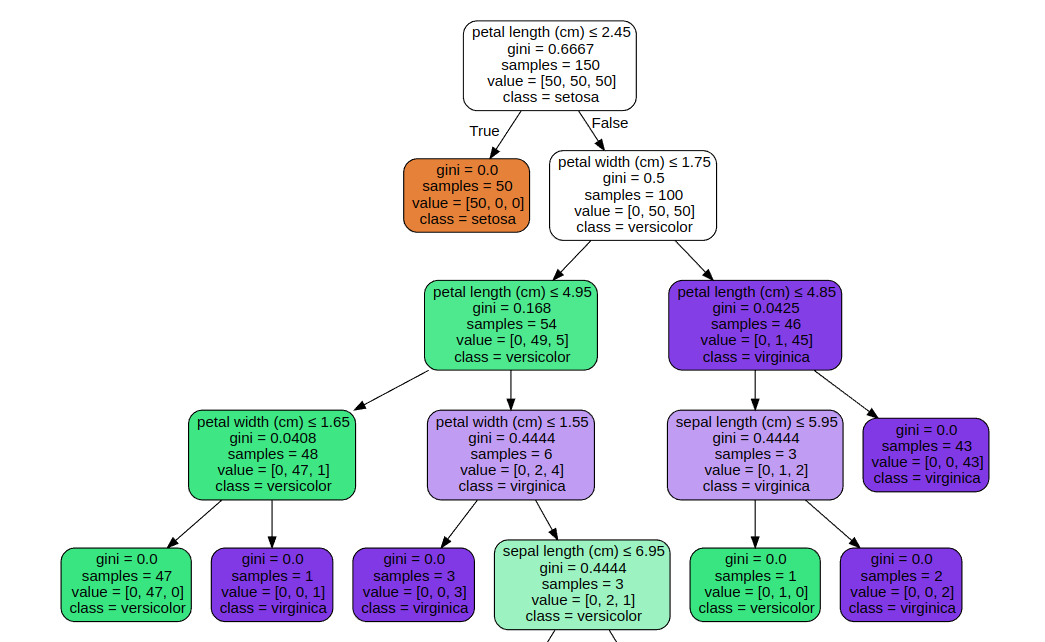

The DT you see above is built based on the Iris-Flower dataset. This dataset consists of 3 different flower species, with each having 50 samples in the dataset. Furthermore each flower is represented by 4 features:


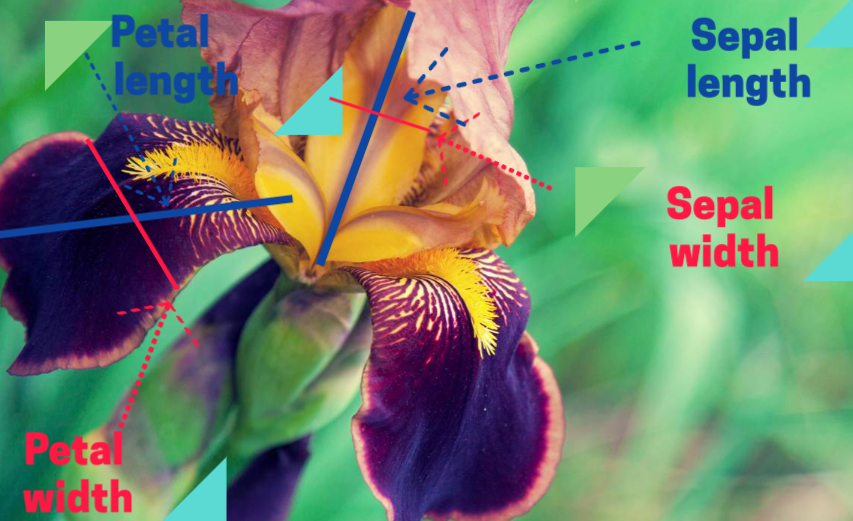

From the above DT we see that they first asekd wether Petal length is smaller than a specific value. If so, then label as **Setosa**, otherwise "ask another question". This will repeat until we arive at the "leaves", where no questions can be asked anymore. Of course DT's can also be used for other tasks, such as regression, however, this we will explore in another notebook. For now we move on to ensemble methods.

<h2 style="color:rgb(0,120,0)">Ensemble Methods: RandomForest</h2>

What is a Random Forest and how exactly does it work? 
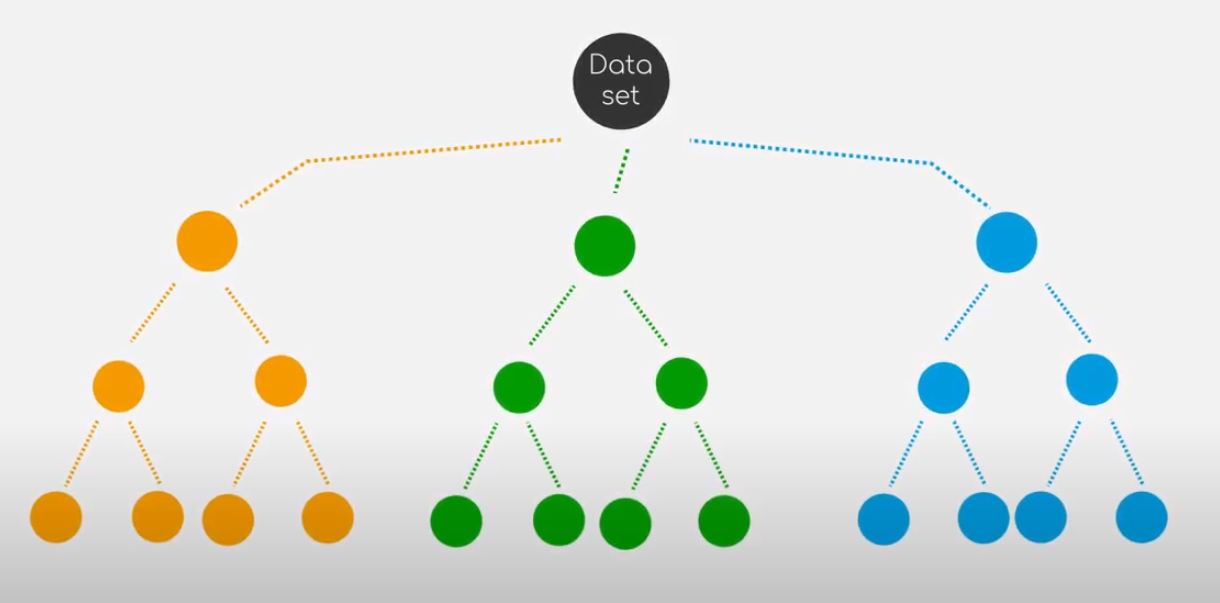

Well, to keep things simple, imagine for now you're faced with a complex problem and need to make a decision. You might seek advice from multiple experts to get a well-rounded perspective. In the context of ML, Random Forest works similarly.
Random Forest generates many decision trees, each trained on a distinct subset of the data, rather than depending on a single decision tree. These trees form a "forest," and each one adds its forecast to the final outcome. The key to Random Forest's power is that these trees are purposefully diverse, constructed with different subsets of data and distinct attributes.

<h2 style="color:rgb(0,120,0)">Our Task</h2>

Our task for this project is to create a ML-classification model, based on the Disease Symptom Prediction Dataset. Why this dataset? Because it is not only openly available to everyone, but also is a very good dataset for beginners to start their very first ML-project. This dataset consistS of 4 different csv-files:
1. **Symptom-severity.csv**: Simple 2 column csv-file, which assigns to each symptom a weight ranging from 1-7.
2. **dataset.csv**: The main dataset we are going to work with. Consisting of 18 columns in total (17 features and 1 1 label column)
3. **symptom_Description.csv**: [Not used] 
4. **symptom_precaution.csv**: [Not used]

During the entire project, we will guide you through the basics of Machine Learning and go through all steps of a typical ML-pipeline. We will start with the data loading and data analysis part, afterwards move on to preprocessing and model implementation and at the end train, test and deploy our model.


**Sidenote**: Since this is only an introductury course, we won't build the ML-models from scratch, but instead make use of some pre-existing models by using the power of sklearn. However, there will probably be another notebook in the future where you can implement your own models from scratch using either Tensorflow/Keras or Pytorch.

**Sidenote 2**: As this notebook is part of the MOOC "Artificial Intelligence & Machine Learning", which can be taken online by anyone, we specifically desgined it to be somewhat interactive. With this we mean it contains Hint Buttons, comprehensive explanations, unit tests, as well as solutions and dynamic, interactive plots.

Without further ado, let's get started. Good luck!

<h1 style="color:rgb(0,120,170)">Modules and Packages</h1>

------------------------------------------------------

<a id="modules-and-packages"></a>

In order to get things done much faster, we want to make use of one of Python's superpowers, it's libraries and packages. One of the main reasons Python is so popular nowadays is that it includes an extensive number of libraries that make developers' lives considerably easier.

In [ ]:
# RUN CODE CELL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets # for the buttons & interactive plots you see in the notebook
import os
import random
import plotly.express as px
import unittest


from tqdm import tqdm
from IPython.display import display, HTML, clear_output
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import linear_model, naive_bayes, ensemble, neighbors
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from joblib import dump, load

from unittest.mock import patch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import utils_test

# DO NOT CHANGE --> otherwise you might get different results and failed unittests
np.random.seed(42)

<details>
<summary style="font-size: larger; color: white; background-color: #3498db; border: 1px solid #3498db; padding: 5px 15px; border-radius: 8px; cursor: pointer;">What does each module stand for?</summary>

<div style="background-color: #E6F7FF; padding: 10px; border-radius: 8px; margin-top: 10px;">
    <a href="https://numpy.org/doc/stable/">NumPy</a>: A library for numerical computations in Python.
    <br>
    <a href="https://pandas.pydata.org/docs/">Pandas</a>: A powerful data manipulation and analysis library.
    <br>
    <a href="https://matplotlib.org/stable/contents.html">Matplotlib</a>: A popular plotting library for creating visualizations.
    <br>
    <a href="https://seaborn.pydata.org/">Seaborn</a>: A data visualization library based on Matplotlib, providing a high-level interface for creating informative and attractive statistical graphics.
    <br>
    <a href="https://scikit-learn.org/stable/">scikit-learn</a> (sklearn): A machine learning library that provides simple and efficient tools for data mining and data analysis. It's built on top of NumPy, SciPy, and Matplotlib.

If you really want to understand everything from 0, we would recommend you to read the respective documentations. However, since there are so many things one could learn alone from those 5 packages, we will stop here for now and continue with the other chapters.</div>



</details>


<h1 style="color:rgb(0,120,170)">Data Loading and Analysis</h1>

------------------------------------------------------

<a id="dataloading-and-analysis"></a>

The first steps of starting a machine learning project typically start with loading the dataset and having a short look at it. Therefore, in this section we will try to get some new insights and try to explore the dataset by using different [visualization techniques](https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html). 

<details>
<summary style="font-size: larger; color: white; background-color: darkorange; border: 1px solid darkorange; padding: 5px 15px; border-radius: 8px; cursor: pointer;">TASK 1: Load the files with pandas</summary>

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    Have a look at the folder "Dataset" and try to load all the csv-files via the pandas module. Afterwards try to display/plot them. After you plot the dataframes, have a closer look. What do you notice? Any missing or strange values? Any difference between the two datasets? When defining the dataframes, name the dataset.csv "df", the other one "df2". 
    
    
</div>
</details>




<details>
<summary style="font-size: larger; color: white; background-color: darkgreen; border: 1px solid darkgreen; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Hint</summary>

<div style="background-color: rgba(0, 128, 0, 0.2); padding: 10px; border-radius: 5px;">
    When trying to load the csv-files, it might be useful to have a closer look at the 
    <a href="https://pandas.pydata.org/docs/reference/io.html" target="_blank" style="color: darkorange; text-decoration: none;">pandas module</a> 
    And for plotting multiple dataframes at the same time, this<a href="https://pandas.pydata.org/docs/user_guide/options.html?highlight=display" target="_blank" style="color: darkorange; text-decoration: none;"> here</a> might come in handy.
   
</div>
</details>


In [ ]:
# TODO: Define the paths
PATH_DATASET = "path/to/dataset"
PATH_SYMPTOM_SEVERITY = "path/to/severity"

# TODO: read csv files
df = None
df2 = None

# TODO: Plot/Show both dataframes (use the Hints)


<details>
<summary style="font-size: larger; color: white; background-color: darkorange; border: 1px solid darkorange; padding: 5px 15px; border-radius: 8px; cursor: pointer;">TASK 2: Count the number of NaN values</summary>

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    When having a closer look at the dataset, you probably also noticed that there are some NaN values (also referred to as "Not a Number"). This usually means that some data is missing and since we want to know how much data is missing, in this part you should try to get the number of NaN values. 
Afterwards run the code-cell below and try to understand the dataset.

</div>
</details>



<details>
<summary style="font-size: larger; color: white; background-color: darkgreen; border: 1px solid darkgreen; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Hint</summary>

<div style="background-color: rgba(0, 128, 0, 0.2); padding: 10px; border-radius: 5px;">
    When trying to get the number of NaN values, you may use 
    <a href="https://pandas.pydata.org/docs/reference/api/pandas.isnull.html" target="_blank" style="color: darkorange; text-decoration: none;">this here</a> 
    However, just keep in mind that this will just give you a list of boolean values. Afterwards try to get the sum of the output you get.
</div>
</details>

In [ ]:
# TODO: Get number of nan_values  --> DO NOT CHANGE THE VARIABLE NAME
nan_counts = None

In [ ]:
# RUN CODE CELL
utils_test.compare_nan_values(nan_counts)

In [ ]:
# RUN CODE CELL 
def plot_nan_counts(change):
    plot_type = change.new
    with output_area:
        clear_output(wait=True)
        nan_counts = df.isnull().sum()
        plt.figure(figsize=(10, 6))
        bar_colors = [utils_test.get_bar_color(count) for count in nan_counts]
        if plot_type == 'bar':
            nan_counts.plot(kind='bar', color=bar_colors)
            plt.xlabel('Column')
        elif plot_type == 'barh':
            bar_colors.reverse()
            nan_counts[::-1].plot(kind='barh', color=bar_colors)
            plt.xlabel('NaN Count')
        plt.ylabel('Column')
        plt.title('Number of NaN Values in Each Column')
        plt.show()

plot_dropdown = widgets.Dropdown(
    options=[('Bar Plot', 'bar'), ('Horizontal Bar Plot', 'barh')],
    description='Select Plot:')

output_area = widgets.Output()
plot_dropdown.observe(plot_nan_counts, names='value')
display(plot_dropdown, output_area)

<details>
<summary style="font-size: larger; color: white; background-color: darkorange; border: 1px solid darkorange; padding: 5px 15px; border-radius: 8px; cursor: pointer;">TASK 3: Make a bar plot of the disease distribution</summary>

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    Now it's time to have a closer look at the distribution of the diseases. For this, you can make a simple bar plot. The bar plot should look as following:
    
    
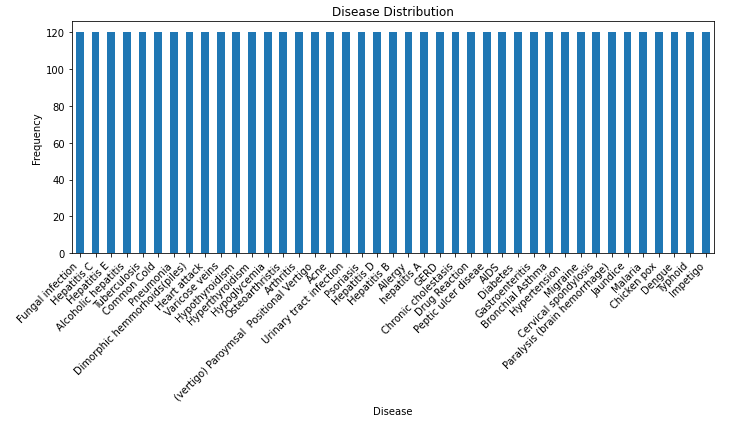
    
The title and axis descriptions should be exactly the same, everything beyond that (e.g legend, different colors...) can be seen as a bonus.
</div>
</details>

<details>
<summary style="font-size: larger; color: white; background-color: darkgreen; border: 1px solid darkgreen; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Hint</summary>

<div style="background-color: rgba(0, 128, 0, 0.2); padding: 10px; border-radius: 5px;">
    First try to get the <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html" target="_blank" style="color: darkorange; text-decoration: none;">total number of counts</a> per disease.
    Afterwards try to make the plot with matplotlib. However, since matplotlib is often considered as rather hard to understand, you might want to speed things up by reading <a href="https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py" target="_blank" style="color: darkorange; text-decoration: none;">this here. </a>
    . 
    
</div>
</details>




In [ ]:
# TODO: Get disease_distribution
disease_distribution = None

# TODO: Use matplotlib to plot the figure  --> don't forget the title, xlabel, ylabel and xticks with a rotation 


In [ ]:
# RUN CODE CELL
utils_test.compare_distribution(disease_distribution)

<details>
<summary style="font-size: larger; color: white; background-color: darkorange; border: 1px solid darkorange; padding: 5px 15px; border-radius: 8px; cursor: pointer;">TASK 4: Get the distribution of the top 10 symptoms</summary>

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    After having a look at the diseases, we now move on to the distribution of the symptoms. For this, you can make a simple bar plot of the top 10 most appearing symptoms. The bar plot should look as following:
    
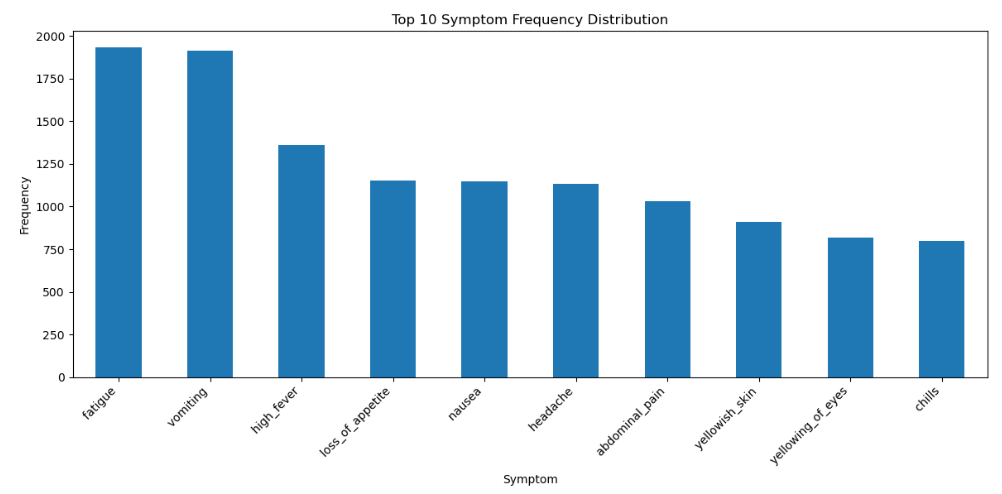    
    

</div>
</details>

<details>
<summary style="font-size: larger; color: white; background-color: darkgreen; border: 1px solid darkgreen; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Hint</summary>

<div style="background-color: rgba(0, 128, 0, 0.2); padding: 10px; border-radius: 5px;">
    One way to get the top 10 symptoms would be to first slice the dataframe using the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html?highlight=iloc#pandas.DataFrame.iloc" target="_blank" style="color: darkorange; text-decoration: none;">iloc function</a> of pandas, to get all values with the exception of the first column. Afterwards apply <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html" target="_blank" style="color: darkorange; text-decoration: none;"> stack() </a> . And for the rest just try to reuse the code from the previous task. (Keep in mind that you should only plot the top 10 values, not all)
    . 

    
</div>
</details>

In [ ]:
# TODO: Get symptom frequency by using the Hint
symptom_frequencies = None

# TODO: Get the top 10 most frequent symptoms out of the symptom_frequencies
top_10_symptoms = None

# TODO: Plot the top 10 symptoms --> you may want to reuse parts of the previous task


In [ ]:
# RUN CODE CELL
utils_test.test_symptom_frequencies(symptom_frequencies)

<details>
<summary style="font-size: larger; color: white; background-color: darkorange; border: 1px solid darkorange; padding: 5px 15px; border-radius: 8px; cursor: pointer;">TASK 5: Analyse Plot</summary>

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    For this task you just need to run the code cell below. Try to get a better understanding of the data. Which symptoms do appear often when having a specific disease?
    And also, what did you notice regarding the disease and symptoms distribution? 
</div>
</details>

In [ ]:
# RUN CODE CELL
disease_dropdown = widgets.Dropdown(
    options=df['Disease'].unique(),
    description='Select Disease:'
)

plot_type_dropdown = widgets.Dropdown(
    options=['pie', 'horizontal_bar', 'bar'],
    description='Select Plot Type:'
)

output_area = widgets.Output()

def get_random_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

def plot_symptom_distribution(disease, plot_type):
    with output_area:
        clear_output(wait=True)
        symptoms = df[df['Disease'] == disease].iloc[:, 1:].stack().value_counts()
        
        if plot_type == 'bar':
            colors = [get_random_color() for _ in range(len(symptoms))]
            plt.figure(figsize=(10, 6))
            symptoms.plot(kind='bar', color=colors)
            plt.title(f'Symptom Distribution for {disease}')
            plt.xlabel('Symptom')
            plt.ylabel('Frequency')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

        elif plot_type == 'horizontal_bar':
            colors = [get_random_color() for _ in range(len(symptoms))]
            plt.figure(figsize=(10, 6))
            symptoms.plot(kind='barh', color=colors)
            plt.title(f'Symptom Distribution for {disease}')
            plt.xlabel('Frequency')
            plt.ylabel('Symptom')
            plt.tight_layout()
            plt.show()

        elif plot_type == 'pie':
            fig = px.pie(symptoms, values=symptoms.values, names=symptoms.index, title=f'Symptom Distribution for {disease}')
            fig.update_traces(textinfo='percent+label')
            fig.update_layout(showlegend=False)
            fig.show()
            

def handle_dropdown_change(change):
    plot_symptom_distribution(disease_dropdown.value, plot_type_dropdown.value)

disease_dropdown.observe(handle_dropdown_change, names='value')
plot_type_dropdown.observe(handle_dropdown_change, names='value')

display(disease_dropdown, plot_type_dropdown, output_area)

As a future AI-Developer/Data Scientist, you will often encounter a lot of errors when dealing with data and also here it won't be different, as you saw from above df. In the next chapters we will therefore try to prepare the dataset in such a way, that it can be used for our ML-model.

<h1 style="color:rgb(0,120,170)">Data Preprocessing</h1>

------------------------------------------------------

<a id="data-preprocessing"></a>

Now that we had a look at the dataset, it's time to make some changes. Based on the previous tasks, we can conclude that the dataset contains a lot of missing values. Furthermore the weights are not given in the dataset itself, so we have to get them from the other dataframe. And as if that wasn't enough, we also have to encode the data in such a way, so that our model can work with it.

<details>
<summary style="font-size: larger; color: white; background-color: darkorange; border: 1px solid darkorange; padding: 5px 15px; border-radius: 8px; cursor: pointer;">TASK 6: Get rid of White-spaces and NaN values</summary>

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    Starting with the first preprocessing step, try to get rid of all white-spaces and NaN values in the dataframe, as this might lead to problems later on. For the second, smaller dataset this is not necessary, as we already checked it for errors.
</div>
</details>

<details>
<summary style="font-size: larger; color: white; background-color: darkgreen; border: 1px solid darkgreen; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Hint</summary>

<div style="background-color: rgba(0, 128, 0, 0.2); padding: 10px; border-radius: 5px;">
    One way to get rid of white-spaces would be to first call <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html" target="_blank" style="color: darkorange; text-decoration: none;">values</a> on df, followed by <a href="https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py" target="_blank" style="color: darkorange; text-decoration: none;"> flatten() .</a>
    This will transform your dataframe into a 1d nd_array.
    Afterwards convert the result into a pandas series and apply <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html" target="_blank" style="color: darkorange; text-decoration: none;"> str.replace() </a>. When that is done, use the "values" function on the series again and also try to reshape the series to the original shape of the dataframe.
    At the end you just need to convert the pandas series back to a dataframe. When doing that, don't forget to set the columns to df.columns.
    What about the NaN values? Well, this is just googling for 5seconds.
    . 

    
</div>
</details>

In [ ]:
# TODO: Flatten your dataframe
data = None

# TODO: Convert your data variable into a pandas series and get rid of the white-space
s = None

# TODO: Now reshape your series (when doing so, you can use reshape(df.shape)) and convert it back to a dataframe
df = None

# TODO: Fill in the NaN values with 0 and plot your dataframe



In [ ]:
# RUN CODE CELL
utils_test.test_data_preprocessing(df)


<details>
<summary style="font-size: larger; color: white; background-color: darkorange; border: 1px solid darkorange; padding: 5px 15px; border-radius: 8px; cursor: pointer;">TASK 7: Data encoding</summary>

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    Before feeding any dataset to our ML-model, we first need to encode it to the right "format". With format we mean encoding text/string to numerical/categorical data. Luckily the second dataframe contains the weights/nummerical values of each symptom. So we simply have to switch the symptom description by their respective values, while values that are 0 in the original df will stay the same.

</div>
</details>

<details>
<summary style="font-size: larger; color: white; background-color: darkgreen; border: 1px solid darkgreen; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Hint</summary>

<div style="background-color: rgba(0, 128, 0, 0.2); padding: 10px; border-radius: 5px;">
    Simply set the index of df2 to "Symptom" and then transform the df2["weight"] to a dictionary.
    Afterwards just use <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html" target="_blank" style="color: darkorange; text-decoration: none;">replace() </a> on the first df and give the "symptom_weights" as input to it. 
    When arriving at this point, feel free to plot the dataframe. You will probably see that there are still some symptoms, that were not replaced. This is because some symptoms don't have a respective weight in the severity dataframe. Therefore,as a last step, you need to call the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html" target="_blank" style="color: darkorange; text-decoration: none;">apply() </a> function on all "Symptom-columns"    More infos regarding this on <a href="https://stackoverflow.com/questions/40095712/when-to-applypd-to-numeric-and-when-to-astypenp-float64-in-python" target="_blank" style="color: darkorange; text-decoration: none;"> StackOverflow</a> . Also don't forget to change the floating numbers to integers instead. 
    
    
</div>
</details>

In [ ]:
# TODO: Get the weights of the symptoms
symptom_weights = None

# TODO: Replace the symptoms with their corresponding weight
df = None

# TODO: Replace the symptoms that were not replaced with 0 and plot the dataframe



In [ ]:
# RUN CODE CELL
utils_test.check_dataframe_int_values(df)


<details>
<summary style="font-size: larger; color: white; background-color: darkorange; border: 1px solid darkorange; padding: 5px 15px; border-radius: 8px; cursor: pointer;">TASK 8: Train-Test-Split</summary>

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
   Create a train and test dataset, where the train_dataset has 85% of all data. Also try to convert the disease-lables to nummerical values and don't forget to shuffle the data before splitting it. 
   If you did everything right, then the size of the dataset should look like this:
   
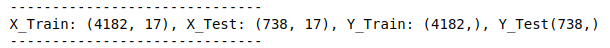
</div>
</details>

<details>
<summary style="font-size: larger; color: white; background-color: darkgreen; border: 1px solid darkgreen; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Hint</summary>

<div style="background-color: rgba(0, 128, 0, 0.2); padding: 10px; border-radius: 5px;">
    Before creating a training and testing dataset, first split the labels (disease) from the features (symptoms). This can be done easily, as you should already know from the previous tasks how to slice a pandas dataframe. After you splitted the dataframe, convert the array with the labels into nummerical/categorical data. There are many ways one could do it, one cool way would be to just use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.fit_transform" target="_blank" style="color: darkorange; text-decoration: none;">LabelEncoder</a> class of sklearn. Just make sure to use the right function.
    Now at the end you just need to make a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank" style="color: darkorange; text-decoration: none;">train_test_split. </a>

    
</div>
</details>

In [ ]:
# TODO: Split your dataframe --> y should contain the labels
X = None
y = None

# TODO: Use the LabelEncoder and encode your labels, also try to print them
y_encoded = None


In [ ]:
# TODO: Split X and y into train-test data respectively (name them x_train, x_test, y_train and y_test)



In [ ]:
# RUN CODE CELL
utils_test.split_encoding_test(y_encoded, x_train, y_train, x_test, y_test)


In [ ]:
# RUN CODE CELL 
plt.figure(figsize=(6, 4))
plt.bar(['X_train', "Y_train", "X_test", 'y_test'], [len(x_train), len(y_train), len(x_test), len(y_test)], color=['blue', "blue",'orange', "orange"])
plt.xlabel('Dataset')
plt.ylabel('Size')
plt.title('Size of Train and Test Datasets')
plt.tight_layout()

plt.show()



<h1 style="color:rgb(0,120,170)">Model Implementation: From training to predicting</h1>

------------------------------------------------------

<a id="model-implementation"></a>
Finally we arrive at the last step, the model implemenation itself. Most of the time AI-Developers aren't implementing or training models, in fact, we often have a hard time to bring the data to the right format and get rid of a lot of useless stuff, as you saw from previous tasks. Now lets get our hands dirty with the ML-models.

<details>
<summary style="font-size: larger; color: white; background-color: darkorange; border: 1px solid darkorange; padding: 5px 15px; border-radius: 8px; cursor: pointer;">TASK 9: Implement Models</summary>

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    In this task, your goal is to load and implement several machine learning models using scikit-learn (sklearn). Specifically, you should load the following models:

   - **SVC (Support Vector Classifier)**
     - Hyperparameter: C = 1

   - **Naive Bayes Classifier**
     - Default settings
    
   - **DecisionTree Classifier**
     - Splitting Criterion: Gini
     - Max Depth: 7
     - Min Samples Split: 2
     - Min Samples Leaf: 2

   - **Ensemble VotingClassifier**
     - Utilize all previous models
     - Parameter: Voting = Hard

    Make sure to follow the instructions for each model and implement them accordingly.
</div>
</details>


<details>
<summary style="font-size: larger; color: white; background-color: darkgreen; border: 1px solid darkgreen; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Hint</summary>

<div style="background-color: rgba(0, 128, 0, 0.2); padding: 10px; border-radius: 5px;">
    <a href="https://scikit-learn.org/stable/search.html?q=classification" target="_blank" style="color: darkorange; text-decoration: none;">This here</a> might be useful for you.

    
</div>
</details>

In [ ]:
# TODO: Load the models
model_svc = None
model_naive = None
model_dt = None
model_ensemble = None

In [ ]:
# RUN CODE CELL
utils_test.test_model_implementation(model_svc, model_dt, model_ensemble)

<details>
<summary style="font-size: larger; color: white; background-color: darkorange; border: 1px solid darkorange; padding: 5px 15px; border-radius: 8px; cursor: pointer;">TASK 10: Train model</summary>

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    Now that you have loaded your models, simply fit the models to the train dataset.
</div>
</details>

<details>
<summary style="font-size: larger; color: white; background-color: darkgreen; border: 1px solid darkgreen; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Hint</summary>

<div style="background-color: rgba(0, 128, 0, 0.2); padding: 10px; border-radius: 5px;">
    When writing "fit the model to the training data", we actually mean train the model. For this just use the 
    <a href="https://scikit-learn.org/stable/tutorial/basic/tutorial.html" target="_blank" style="color: darkorange; text-decoration: none;">fit() </a> method of sklearn and give the x_train and the respective labels as input.
    Just like the fit() method, there is also one for prediction, for more info however click on above link.

    
</div>
</details>

In [ ]:
# TODO: Train the models



<details>
<summary style="font-size: larger; color: white; background-color: darkorange; border: 1px solid darkorange; padding: 5px 15px; border-radius: 8px; cursor: pointer;">TASK 11: Prediction, Evaluation and model-saving</summary>

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    Now that you have trained your models, simply predict with them based on the test data. For questions just use the Hint button above again. If everything was implemented correctly, then your plot at the end of this task should look similar to this one here:
    

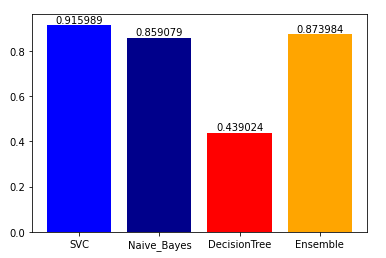    

</div>
</details>

In [ ]:
# TODO: Get the predictions of each model
preds_svc = None
preds_naive = None
preds_dt = None
preds_ensemble = None

In [ ]:
# RUN BELOW CELL
accuracies = [accuracy_score(y_test, pred) for pred in [preds_svc, preds_naive, preds_dt, preds_ensemble]]
fig, ax = plt.subplots()
bars = ax.bar(["SVC", "Naive_Bayes", "DecisionTree", "Ensemble"], accuracies, color=["blue", "darkblue", "red", "orange"])
ax.bar_label(bars)

In [ ]:
# RUN CODE CELL 
model_predictions = [preds_svc, preds_naive, preds_dt, preds_ensemble]
model_names = ["SVC", "Naive_Bayes", "DecisionTree", "Ensemble"]

for preds, model_name in zip(model_predictions, model_names):
    conf_mat = confusion_matrix(y_test, preds)
    df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
    f1_macro = f1_score(y_test, preds, average='macro')
    accuracy = accuracy_score(y_test, preds)
    
    print(f"Model: {model_name}")
    print('F1-score% =', f1_macro * 100, '|', 'Accuracy% =', accuracy * 100)
    
    sns.heatmap(df_cm)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

<h1 style="color:rgb(0,120,170)">Optimization and Evaluation</h1>

------------------------------------------------------

<a id="optimization_evaluation"></a>

Having a look at the above plot, we see that our best model was the SVC. Our DecisionTree classifier on the other hand didn't quite live up to its expectations. Therefore, in this section, we will try to further optimize our model and try to beat the SVC model. We will also have a look at other evaluation metrics, as for the plot above we only considered "Accuracy". For simplicity, we will first go through some evaluation metrics and try to get a better understanding as to when to use which metric. Only then will we continue with the optimization part.

<details>
<summary style="font-size: larger; color: white; background-color: darkorange; border: 1px solid darkorange; padding: 5px 15px; border-radius: 8px; cursor: pointer;">TASK 12: Evaluation metrics</summary>

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    In this section we want to use 4 different evaluation metrics and see how they differ from each other. For this, create a list for each evaluation metric and fill in the respective values. The metrics to be used are accuracy, precision, recall and f1_score.

</div>
</details>

<details>
<summary style="font-size: larger; color: white; background-color: darkgreen; border: 1px solid darkgreen; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Hint</summary>

<div style="background-color: rgba(0, 128, 0, 0.2); padding: 10px; border-radius: 5px;">
    Luckily there are a lot of predefined functions in sklearn, which you can use
    <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics" target="_blank" style="color: darkorange; text-decoration: none;">here. </a> If you want to learn more about different evaluation metrics, then we would definitely recommend to read through the sklearn documentation, as most of the metrics are already explained in a few sentences.

    
</div>
</details>

In [ ]:
# TODO: Get scores of evaluation metrics into a list
accuracies = []
precisions = []
recalls = []
f1_scores = []

In [ ]:
# RUN CODE CELL
metrics = {
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1-Score": f1_scores
}

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2 

models = ["SVC", "Naive_Bayes", "DecisionTree", "Ensemble"]
colors = ["blue", "darkblue", "red", "orange"]
for i, (metric_name, metric_values) in enumerate(metrics.items()):
    x = [j + i * width for j in range(len(models))]
    bars = ax.bar(x, metric_values, width=width, label=metric_name, color=colors[i])
    ax.bar_label(bars, fmt='%.3f')
    
ax.set_xlabel("Models")
ax.set_ylabel("Scores")
ax.set_title("Model Evaluation Metrics")
ax.set_xticks([j + width for j in range(len(models))])
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


<details>
<summary style="font-size: larger; color: white; background-color: #3498db; border: 1px solid #3498db; padding: 5px 15px; border-radius: 8px; cursor: pointer;">When to use which evaluation? </summary>

<div style="background-color: #E6F7FF; padding: 10px; border-radius: 8px; margin-top: 10px;">

Evaluation metrics are critical in measuring the performance and usefulness of your models, since they provide vital insights into their prediction capabilities on new, previously unseen data.
But how do you decide which one to use? 

Here are four popular evaluation metrics:

### 1. Accuracy
Accuracy is the percentage of correctly classified instances among all instances. It's an excellent starting point for balanced class distributions. It does not, however, take into consideration class imbalances and treats false positives and false negatives equally.  We use accuracy in cases where the class distribution is roughly balanced, and you want a straightforward measure of overall correctness.

### 2. Precision
Precision is concerned with the precision of positive forecasts. It provides an answer to the question, "Of all the instances predicted as positive, how many were actually positive?" When false positives are costly or undesired, precision is critical. In medical diagnostics, for example, a false positive can result in unneeded therapies or stress for the patient.

### 3. Recall
Recall, also known as True Positive Rate or Sensitivity, measures the model's ability to identify all relevant instances.Recall is vital when missing positive instances (false negatives) is costly. For instance, in security, you want to detect as many intrusions as possible.

### 4. F1-Score
The F1-Score is the harmonic mean of precision and recall, providing a balance between the two. It's particularly useful when you need to consider both false positives and false negatives, especially in situations with class imbalance.

In conclusion, the choice of evaluation metric in classification tasks should align with your specific goals and the impact of false positives and false negatives in your application. Understanding the characteristics of each metric and how they relate to the problem context is key to making an informed decision.
    
    
</div>



</details>


<details>
<summary style="font-size: larger; color: white; background-color: darkorange; border: 1px solid darkorange; padding: 5px 15px; border-radius: 8px; cursor: pointer;">TASK 13: Optimize the DecisionTree Classifier</summary>

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    Your next task is to create another DecisionTree Classifier model. This time you will also need to fine-tune it by trying out different parameters and see what works well. To avoid getting errors, max_depth should be at least 1, while min_samples_split should be at least 2. After you have trained your models, load your best model together with your best parameters and the corresponding model_score and print the results. At the end, your best model should be able to defeat the SVC model in at least 3/4 evaluation metrics.

  
</div>
</details>

<details>
<summary style="font-size: larger; color: white; background-color: darkgreen; border: 1px solid darkgreen; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Hint</summary>

<div style="background-color: rgba(0, 128, 0, 0.2); padding: 10px; border-radius: 5px;">
    In order to optimize your decision tree model, we will use 
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html" target="_blank" style="color: darkorange; text-decoration: none;">GridSearchCV. </a> For this first define a new DT-classifier based on the DecisionTreeClassifier Class (without specifying any parameters). Next up, fill up the param_grid dictionary with values you think might give good results. At the end call the GridSearchCV with your empty classifier and param_grid as input. Also set the parameter scoring="accuracy" and cv=5.

    
</div>
</details>

In [ ]:
# TODO: Initialize a new DecisionTree Classifier (without any parameters)
new_dt_model = None

# TODO: Fill in some parameters and play around a bit, also try to understand how the model performance changes based
# on the parameters you provided
param_grid = {
    'max_depth': ["REPLACE_ME"],
    'min_samples_split': ["REPLACE_ME"],
    'min_samples_leaf': ["REPLACE_ME"],
    'criterion': ["REPLACE_ME"]
}

# TODO: Apply GridSearchCV to fine-tune your model. For this input your model, param_grid and set scoring and cv accroding to Hint
grid_search = None


In [ ]:
# TODO: Train your new model (in this case use it on grid_search)


<details>
<summary style="font-size: larger; color: white; background-color: darkgreen; border: 1px solid darkgreen; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Hint</summary>

<div style="background-color: rgba(0, 128, 0, 0.2); padding: 10px; border-radius: 5px;">
    Want to know how to load the best model? Have a closer look at the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html" target="_blank" style="color: darkorange; text-decoration: none;">GridSearchCV </a>  documentation and scroll down a little bit to the attributes_section. Simply call grid_search.attribute_you_want_to_use
    
</div>
</details>

In [ ]:
# TODO: Get the best parameters, model and model score
best_params = None
best_model = None
best_model_score = None

# TODO: Print your results


In [ ]:
# RUN CODE CELL
cv_results = grid_search.cv_results_
param_results = list(zip(cv_results['params'], cv_results['mean_test_score']))
param_results.sort(key=lambda x: x[1], reverse=True)

for params, mean_score in param_results:
    print("="*30)
    print("Model Hyperparameters:", params)
    print("Mean Test Score (Accuracy):", mean_score)
    print()

In [ ]:
# RUN CODE CELL  --> Try to beat the SVC model in 3/4 evaluation metrics
utils_test.compare_models(best_model, model_svc, x_test, y_test)


<details>
<summary style="font-size: larger; color: white; background-color: darkorange; border: 1px solid darkorange; padding: 5px 15px; border-radius: 8px; cursor: pointer;">TASK 14: Save your models</summary>

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    Create a folder with the name "saved_models" in the same directory as your current notebook. When creating this folder, check wether this folder already exists. Afterwards save your models with the help of <a href="https://scikit-learn.org/stable/model_persistence.html" target="_blank" style="color: darkorange; text-decoration: none;">joblib .</a> 

</div>
</details>

<details>
<summary style="font-size: larger; color: white; background-color: darkgreen; border: 1px solid darkgreen; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Hint</summary>

<div style="background-color: rgba(0, 128, 0, 0.2); padding: 10px; border-radius: 5px;">
    In order to create a directory, try to use the 
    <a href="https://docs.python.org/3/library/os.html" target="_blank" style="color: darkorange; text-decoration: none;">os module. </a> 
    
</div>
</details>

In [ ]:
# TODO: Create directory if needed 

# TODO: Save SVC, NaiveBayes, Ensemble and your best DTC model


<h1 style="color:rgb(0,120,170)">Bonus: Model deployment</h1>

------------------------------------------------------

<a id="bonus"></a>

After all the hard work, we now want to see our models in action. Well, and what could be better than having a simple interface where you simply choose 5 symptoms and then get a prediction of the disease?

<details>
<summary style="font-size: larger; color: white; background-color: darkorange; border: 1px solid darkorange; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Bonus Task: Predict the disease</summary>

<div style="background-color: rgba(255, 255, 0, 0.2); padding: 10px; border-radius: 5px;">
    Before doing some predictions, first load the models you saved earlier with joblibs library.
    Create a function called predict_disease, which takes as input a list symptoms "symptom_list", a list of models "models" and the "symptom_weights" you defined earlier on. Also check in the predict_disease function, whether the "symptom_list" has a size between 3 and 17. 
    
</div>
</details>

<details>
<summary style="font-size: larger; color: white; background-color: darkgreen; border: 1px solid darkgreen; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Hint</summary>

<div style="background-color: rgba(0, 128, 0, 0.2); padding: 10px; border-radius: 5px;">
    First load the models you saved earlier on.
    Afterwards define the function "predict_disease" with the three arguements mentioned in the task description. Check wether "symptom_list" has a size between 3 & 17. Now, loop through the symptom_list and replace values that are not in the "symptom_weights" with 0, else replace them by their respective weight.
    Next up, make sure that your symptom_list has always a length of 17, if not, add 0 values to it. One way to do it would be to do a while loop and add 0's as long as the list is smaller than 17. At the end, loop through the models list, get the prediction and print it together with the name of the model.


    
</div>
</details>

<details>
<summary style="font-size: larger; color: white; background-color: blue; border: 1px solid blue; padding: 5px 15px; border-radius: 8px; cursor: pointer;">SOLUTION BONUS</summary>

<div style="background-color: #E6F7FF; padding: 10px; border-radius: 8px; margin-top: 10px;">

```python
def predict_disease(symptoms, models, symptom_weights):
    if len(symptoms) < 3 or len(symptoms) > 17:
        print("Please select at least 3 and max. 17 symptoms.")
        return
    replaced_list = [0 if x not in symptom_weights else symptom_weights[x] for x in symptoms]
    while len(replaced_list) < 17:
        replaced_list.append(0)
    for mod in models:
        pred = mod.predict(np.array(replaced_list).reshape(1, -1))
        print(f"{type(mod).__name__}: ", pred, label_encoder.inverse_transform(pred))

    
    
    


In [ ]:
# TODO: Load models with the same variable_names as before
model_svc = None
model_naive = None
model_dt = None
model_ensemble = None

# TODO: Save models in list
models = []

In [ ]:
# TODO: Create the predict_disease function


In [ ]:
# RUN CODE CELL

selected_symptoms = []

symptom_selector = widgets.SelectMultiple(
    options=df2["Symptom"].to_list(),
    description='Select Symptoms:',
    disabled=False,
    layout=widgets.Layout(width='400px', height='200px')
)

predict_button = widgets.Button(description="Predict")

output = widgets.Output()

selected_symptoms_output = widgets.Output()

def update_selected_symptoms(change):
    global selected_symptoms
    selected_symptoms = list(symptom_selector.value)
    with selected_symptoms_output:
        selected_symptoms_output.clear_output()
        print("Selected Symptoms (in order):")
        for idx, symptom in enumerate(selected_symptoms):
            print(f"{idx + 1}. {symptom}")

symptom_selector.observe(update_selected_symptoms, 'value')

def predict_button_click(b):
    with output:
        output.clear_output()
        predict_disease(selected_symptoms, models, symptom_weights)

predict_button.on_click(predict_button_click)

display(widgets.Label("Select at least 3 symptoms:"))
display(symptom_selector)
display(widgets.HBox([predict_button, selected_symptoms_output]))
display(output)
